In [2]:
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [1]:
df=pd.read_csv("nodes-addresses.csv", low_memory=False)
print(len(set(df["countries"])))

NameError: name 'pd' is not defined

In [3]:
df[df.countries=="Ireland"]._id.count()

899

In [4]:
df1=pd.read_csv("nodes-officers.csv", low_memory=False)
df1[df1["name"]=="EL PORTADOR"].shape[0]

9325

<AxesSubplot:xlabel='countries', ylabel='count'>

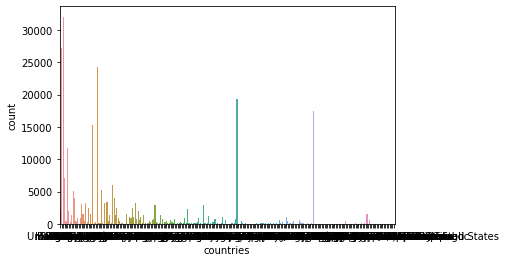

In [5]:
sns.countplot(x="countries", data=df)

In [6]:
len(df.countries.unique())

238

In [7]:
df.countries.value_counts()[:20]

China                     32067
Hong Kong                 27179
United States             24248
Barbados                  19344
Aruba                     17512
Taiwan                    15326
United Kingdom            11706
Singapore                  7149
Russia                     5963
British Virgin Islands     5282
Switzerland                5113
Jersey                     3932
Bermuda                    3920
Indonesia                  3412
United Arab Emirates       3283
Panama                     3257
Malaysia                   3241
Canada                     3139
Brazil                     2979
Cyprus                     2842
Name: countries, dtype: int64

In [8]:
res = df.groupby('countries')['node_id'].nunique()
res.nlargest(20)

countries
China                     32067
Hong Kong                 27179
United States             24248
Barbados                  19344
Aruba                     17512
Taiwan                    15326
United Kingdom            11706
Singapore                  7149
Russia                     5963
British Virgin Islands     5282
Switzerland                5113
Jersey                     3932
Bermuda                    3920
Indonesia                  3412
United Arab Emirates       3283
Panama                     3257
Malaysia                   3241
Canada                     3139
Brazil                     2979
Cyprus                     2842
Name: node_id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='countries'>

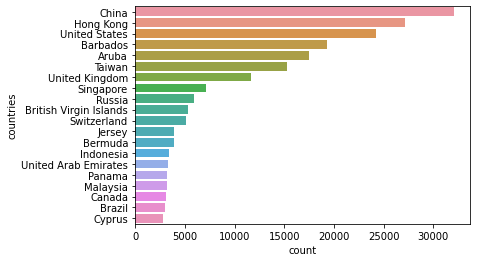

In [9]:
sns.countplot(y="countries", data=df, order=df.countries.value_counts()[:20].index)

In [10]:
import pandas as pd
import seaborn as sns
relations = pd.read_csv("relationships.csv", low_memory=False)
officers = pd.read_csv("nodes-officers.csv", low_memory=False)
entities = pd.read_csv("nodes-entities.csv", low_memory=False)
relations._type.value_counts()[:20]

officer_of                  1695044
registered_address           807313
intermediary_of              598546
same_name_as                  89218
similar                       46761
same_company_as               15523
connected_to                  12145
same_as                        4272
same_id_as                     3120
underlying                     1238
similar_company_as              203
probably_same_officer_as        132
same_address_as                   5
same_intermediary_as              4
Name: _type, dtype: int64

In [11]:
relations_officers_of = relations[relations._type == "officer_of"]
relations_officers_of

_start     _end       _type                        link status  \
15        421953      604  officer_of              shareholder of    NaN   
179       388171      604  officer_of              shareholder of    NaN   
456       388171     2145  officer_of              shareholder of    NaN   
458       366291     2145  officer_of              shareholder of    NaN   
464       350257     2145  officer_of              shareholder of    NaN   
...          ...      ...         ...                         ...    ...   
3273455  1633725  1707298  officer_of     legal representative of    NaN   
3273456  1633725  1707302  officer_of  judicial representative of    NaN   
3273457  1633725  1707298  officer_of                secretary of    NaN   
3273458  1790371  1690480  officer_of  judicial representative of    NaN   
3273459  1790371  1690479  officer_of     legal representative of    NaN   

          start_date     end_date                                    sourceID  
15       17-NOV-2005          NaN                               Panama Papers  
179      17-NOV-2005          NaN                               Panama Papers  
456      05-JAN-2006          NaN                               Panama Papers  
458      10-FEB-2006          NaN                               Panama Papers  
464      05-JAN-2006  10-FEB-2006                               Panama Papers  
...              ...          ...                                         ...  
3273455          NaN          NaN  Paradise Papers - Malta corporate registry  
3273456          NaN          NaN  Paradise Papers - Malta corporate registry  
3273457          NaN          NaN  Paradise Papers - Malta corporate registry  
3273458          NaN          NaN  Paradise Papers - Malta corporate registry  
3273459          NaN          NaN  Paradise Papers - Malta corporate registry  

[1695044 rows x 8 columns]

In [12]:
officers_officersof = officers.merge(relations_officers_of, how='inner', left_on='_id', right_on='_start')
off_offof_ent = officers_officersof.merge(entities, left_on='_end', right_on='_id')
off_offof_ent

_id_x  node_id_x                   name_x           countries_x  \
0         228598   12000001               KIM SOO IN           South Korea   
1         323378   12097201              SONG SI HAN           South Korea   
2         326697   12100428          HYUN MYUNG CHUL                Russia   
3         335419   12109116      KIM WALTER YANGHOON         United States   
4         431596   12205214        MALIVANOV SERGUEI             Hong Kong   
...          ...        ...                      ...                   ...   
1686128  1969294  240050867        HASHEM KHOSROVANI  United Arab Emirates   
1686129  1969304  240069001        Edgardo Eloy Díaz                Panama   
1686130  1969305  240069002  José Creuheras Margenat                 Spain   
1686131  1969306  240069003       Columna Marti Pico                   NaN   
1686132  1969307  240069004         Myrna de Navarro                   NaN   

        country_codes_x                                         sourceID_x  \
0                   KOR                                      Panama Papers   
1                   KOR                                      Panama Papers   
2                   RUS                                      Panama Papers   
3                   USA                                      Panama Papers   
4                   HKG                                      Panama Papers   
...                 ...                                                ...   
1686128         ARE;CHE  Pandora Papers - Alemán, Cordero, Galindo & Le...   
1686129             PAN  Pandora Papers - Alemán, Cordero, Galindo & Le...   
1686130             ESP  Pandora Papers - Alemán, Cordero, Galindo & Le...   
1686131             NaN  Pandora Papers - Alemán, Cordero, Galindo & Le...   
1686132             NaN  Pandora Papers - Alemán, Cordero, Galindo & Le...   

                                             valid_until_x note_x   _start  \
0           The Panama Papers data is current through 2015    NaN   228598   
1           The Panama Papers data is current through 2015    NaN   323378   
2           The Panama Papers data is current through 2015    NaN   326697   
3           The Panama Papers data is current through 2015    NaN   335419   
4           The Panama Papers data is current through 2015    NaN   431596   
...                                                    ...    ...      ...   
1686128              Provider data is current through 2017    NaN  1969294   
1686129  Pandora Papers - Alcogal data is current throu...    NaN  1969304   
1686130  Pandora Papers - Alcogal data is current throu...    NaN  1969305   
1686131  Pandora Papers - Alcogal data is current throu...    NaN  1969306   
1686132  Pandora Papers - Alcogal data is current throu...    NaN  1969307   

            _end  ... struck_off_date dorm_date   status_y service_provider  \
0          74508  ...     31-OCT-2007       NaN  Defaulted  Mossack Fonseca   
1          74508  ...     31-OCT-2007       NaN  Defaulted  Mossack Fonseca   
2          74508  ...     31-OCT-2007       NaN  Defaulted  Mossack Fonseca   
3          74508  ...     31-OCT-2007       NaN  Defaulted  Mossack Fonseca   
4          74508  ...     31-OCT-2007       NaN  Defaulted  Mossack Fonseca   
...          ...  ...             ...       ...        ...              ...   
1686128  1607897  ...             NaN       NaN     Active              NaN   
1686129  1969303  ...             NaN       NaN  Dissolved              NaN   
1686130  1969303  ...             NaN       NaN  Dissolved              NaN   
1686131  1969303  ...             NaN       NaN  Dissolved              NaN   
1686132  1969303  ...             NaN       NaN  Dissolved              NaN   

          ibcRUC country_codes_y             countries_y  \
0         211317             USA           United States   
1         211317             USA           United States   
2         211317             USA           United States   
3         2

In [13]:
m= off_offof_ent.groupby(by='service_provider').sum()
m

_id_x       node_id_x        _start  \
service_provider                                                         
Appleby                     276261261652  19258384732876  276261261652   
Commonwealth Trust Limited   45297194093      3669583904   45297194093   
Mossack Fonseca             109890254877   3763180540565  109890254877   
Portcullis Trustnet         164074796923     22977048049  164074796923   

                                    _end         _id_y       node_id_y  \
service_provider                                                         
Appleby                     265481918253  265481918253  19722749858076   
Commonwealth Trust Limited   39673930034   39673930034     13169930528   
Mossack Fonseca              34196133267   34196133267   3127800685885   
Portcullis Trustnet         134256058452  134256058452     33773614440   

                             internal_id  
service_provider                          
Appleby                     0.000000e+00  
Commonwealth Trust Limited  0.000000e+00  
Mossack Fonseca             4.733426e+11  
Portcullis Trustnet         0.000000e+00

In [14]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Appleby to Portcullis Trustnet
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_x        4 non-null      int64  
 1   node_id_x    4 non-null      int64  
 2   _start       4 non-null      int64  
 3   _end         4 non-null      int64  
 4   _id_y        4 non-null      int64  
 5   node_id_y    4 non-null      int64  
 6   internal_id  4 non-null      float64
dtypes: float64(1), int64(6)
memory usage: 256.0+ bytes


In [15]:
off_offof_ent[['name_x','service_provider']].groupby(by='service_provider').head()

name_x            service_provider
0                                   KIM SOO IN             Mossack Fonseca
1                                  SONG SI HAN             Mossack Fonseca
2                              HYUN MYUNG CHUL             Mossack Fonseca
3                          KIM WALTER YANGHOON             Mossack Fonseca
4                            MALIVANOV SERGUEI             Mossack Fonseca
309357          Bisbro Investment Company Ltd.         Portcullis Trustnet
309358           Dr. Yousuf Al-Fathel Al-Sabah         Portcullis Trustnet
309359                    Bader F. Al-Rezaihan         Portcullis Trustnet
309360                    Bader F. Al-Rezaihan         Portcullis Trustnet
309361             Fahed Jaber Al-Ali Al-Sabah         Portcullis Trustnet
314415                         Geoffrey Taylor  Commonwealth Trust Limited
314416                           Sergey Linkov  Commonwealth Trust Limited
314417                        Irina Kazantseva  Commonwealth Trust Limited
314418                         Geoffrey Taylor  Commonwealth Trust Limited
314419                           Yan Radzevich  Commonwealth Trust Limited
634673                          Ibrahim Mahama                     Appleby
634674    Engineers & Planners Company Limited                     Appleby
634675           Darbara Limited - Isle of Man                     Appleby
634676  General Managers Limited - Isle of Man                     Appleby
634677                          Yukio Hatoyama                     Appleby

In [37]:
#off_offof_ent[['name_x','service_provider']].groupby(by='service_provider').value_counts()

In [77]:
import pandas as pd
import seaborn as sns

def create_dict_from_DF (file1, file2, file3):
    relations = pd.read_csv(file1, low_memory=False)
    officers = pd.read_csv(file2, low_memory=False)
    entities = pd.read_csv(file3, low_memory=False)
    DF = officers.merge(relations[relations._type == "officer_of"], how='inner', left_on='_id', right_on='_start')
    DF = DF.merge(entities, how='inner', left_on='_end', right_on='_id', suffixes=('_officers', '_entities')).service_provider.value_counts()
    dico = DF.to_dict()
    print(dico)
    return dico

dict_off_ent = create_dict_from_DF("relationships.csv", "nodes-officers.csv", "nodes-entities.csv")

{'Mossack Fonseca': 309357, 'Appleby': 240495, 'Portcullis Trustnet': 226339, 'Commonwealth Trust Limited': 62342}


In [66]:
dict_off_ent.keys()

dict_keys(['Mossack Fonseca', 'Appleby', 'Portcullis Trustnet', 'Commonwealth Trust Limited'])

In [67]:
dict_off_ent.values()

dict_values([309357, 240495, 226339, 62342])